In [1]:
from tensorflow.keras.datasets import reuters
(X_train,y_train),(X_test,y_test)=reuters.load_data(num_words=1000,test_split=0.2)

C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
from tensorflow.keras.preprocessing import sequence
X_train=sequence.pad_sequences(X_train,maxlen=50)
X_test=sequence.pad_sequences(X_test,maxlen=50)

In [3]:
from tensorflow.keras import utils
y_train=utils.to_categorical(y_train)
y_test=utils.to_categorical(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()
model.add(Embedding(1000,100))
model.add(LSTM(100))
model.add(Dense(46,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [7]:
hist = model.fit(X_train, y_train, batch_size=100,epochs=2, validation_split=0.2)

Epoch 1/2
72/72 [==============================] - 9s 94ms/step - loss: 3.0520 - accuracy: 0.2677 - val_loss: 2.4075 - val_accuracy: 0.3450
Epoch 2/2
72/72 [==============================] - 6s 78ms/step - loss: 2.3694 - accuracy: 0.3675 - val_loss: 2.0601 - val_accuracy: 0.4869


In [8]:
print("\n 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

71/71 [==============================] - 1s 9ms/step - loss: 2.0658 - accuracy: 0.4964

 정확도: 0.4964


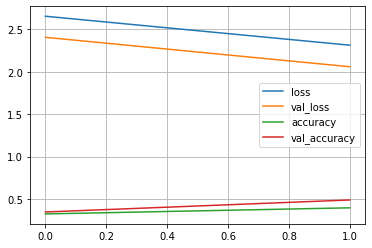

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [10]:
import numpy as np
pred=model.predict(X_test[12].reshape(-1,50))
np.argmax(pred[0])

4

In [11]:
np.argmax(y_test[12])

1